<IPython.core.display.Javascript object>


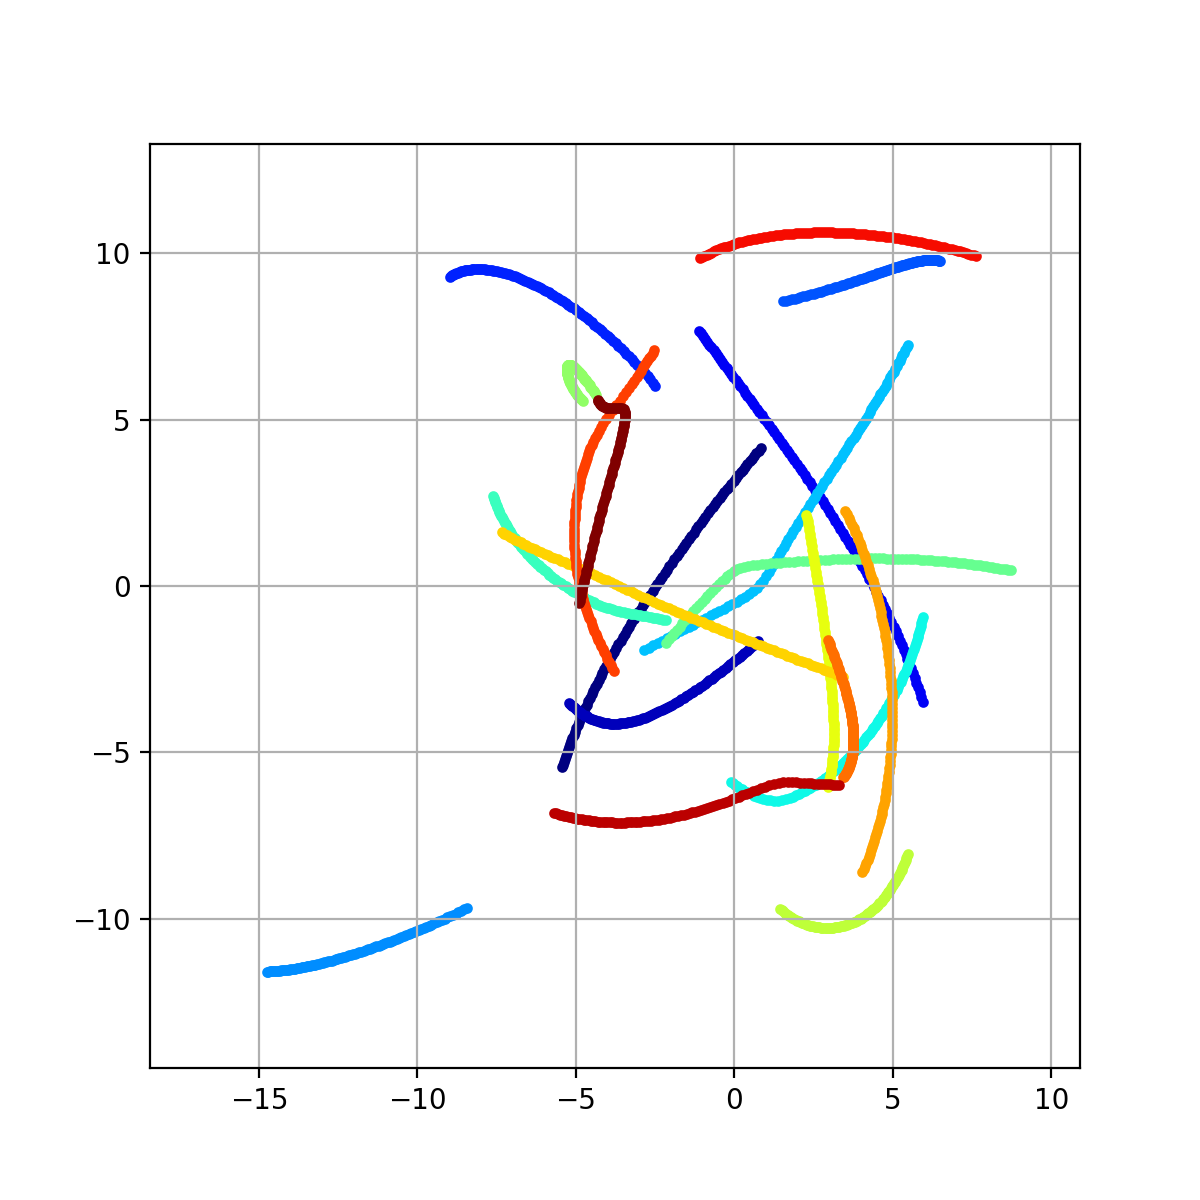

<IPython.core.display.Javascript object>


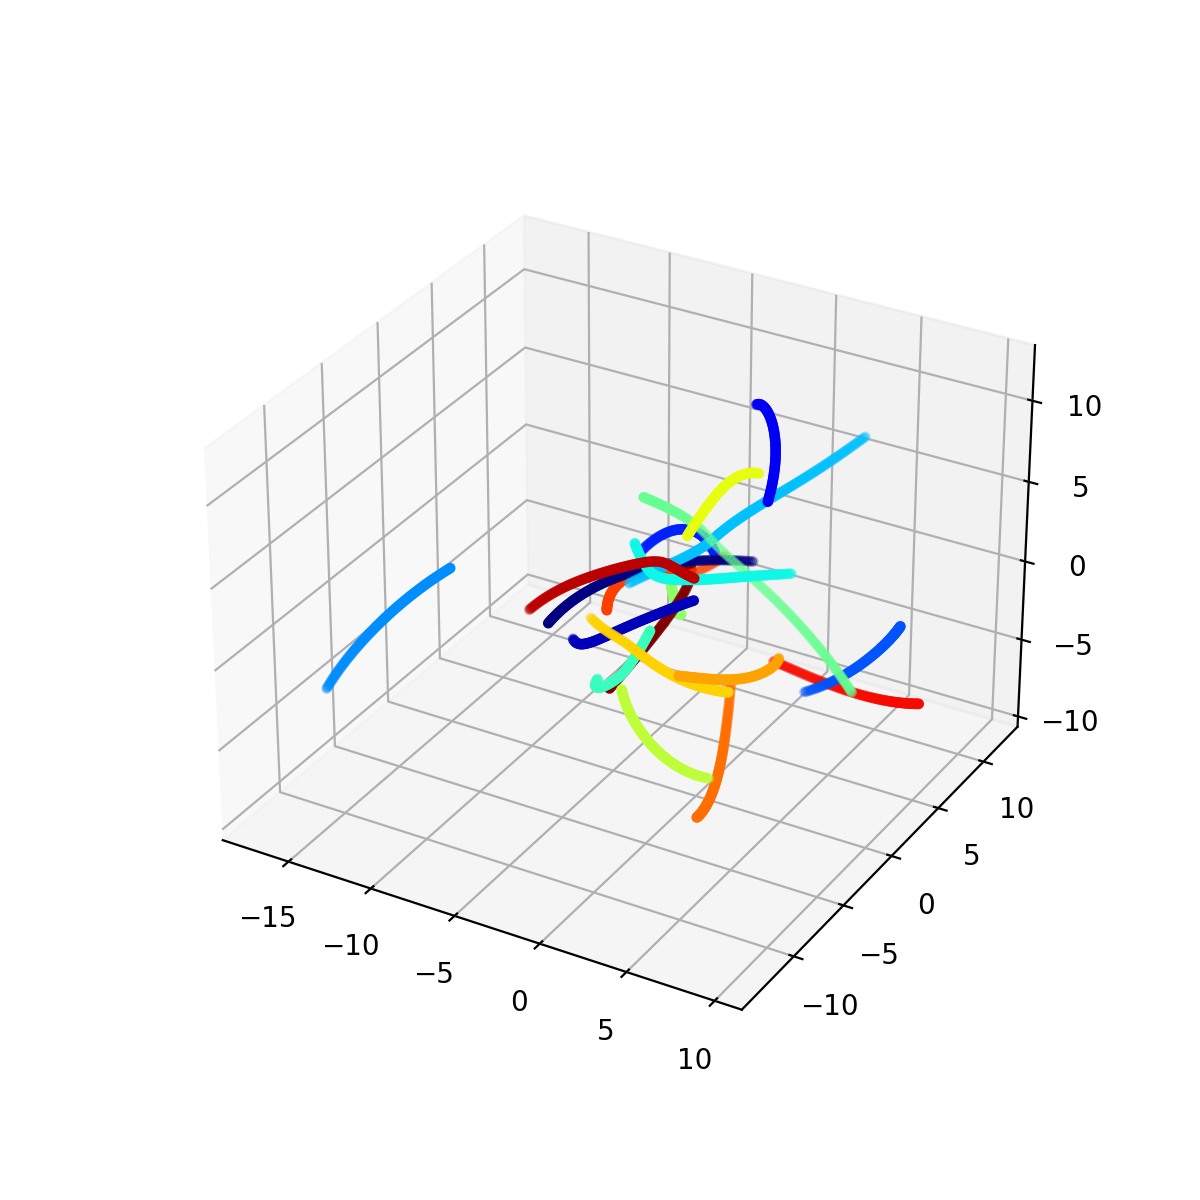

<IPython.core.display.Javascript object>


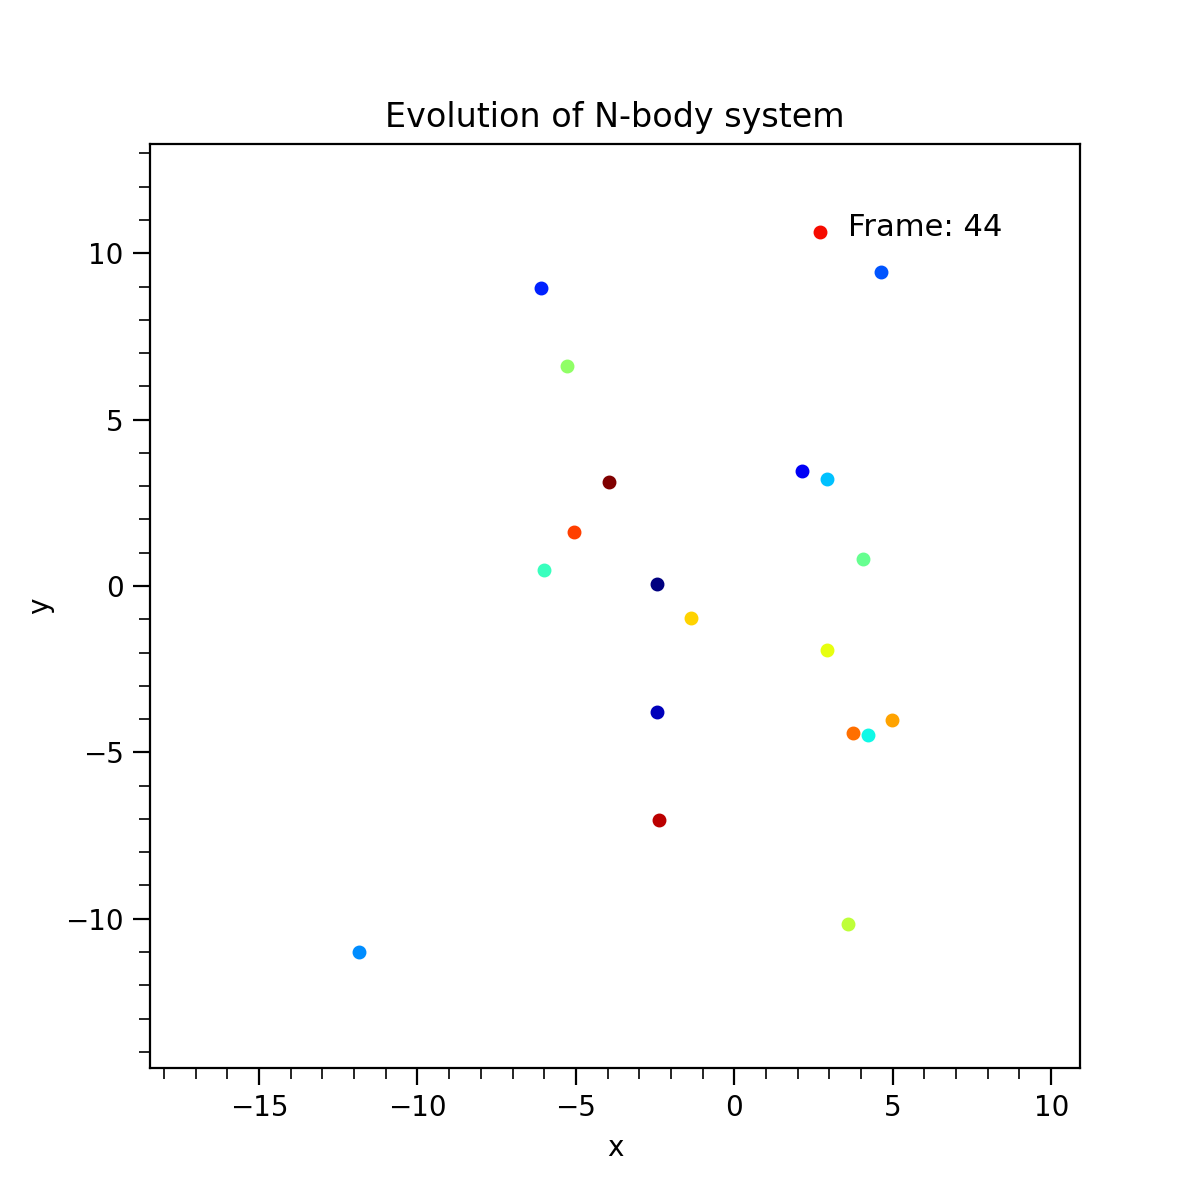

In [6]:
"""
FOR ANY NUMBER OF PARTICLES (maybe if there are many, the size of the marker in the plot should be smaller)
"""

# Libraries
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os as os
%matplotlib notebook

# File access
path = './'
filename = 'output_ex2.txt'

size = 8

"""
Open the file and read the data
"""

with open(path+filename, 'r') as file:
    n_cols = len(   np.array(file.readline().strip().split()   ).astype(float))
    n_particles = (n_cols-1)//3
    
    times = np.zeros((1000))
    positions = np.zeros((n_particles, 3, 1000))
    
    counter = 0 # Number of lines in the file
    for line in file:
        # Strip whitespace and split by spaces
        data = np.array(line.strip().split()).astype(float)
        times[counter] = data[0]
        for ii in range(n_particles):
            positions[ii, :, counter] = data[(ii*3)+1 : ((ii+1)*3)+1]
        
        counter += 1
        
    times = times[:counter]
    positions = positions[:, :, :counter]
    

# Left and right edges
xlim_l, xlim_r = 1.25*np.min(positions[:,0,:]), 1.25*np.max(positions[:,0,:])

# Bottom and top edges
ylim_b, ylim_t = 1.25*np.min(positions[:,1,:]), 1.25*np.max(positions[:,1,:])


    
"""
Get N colors
"""

cmap = plt.get_cmap('jet')

# Generate N evenly spaced values between 0 and 1
color_values = np.linspace(0, 1, n_particles)

# Sample colors from the colormap
colors = [cmap(value) for value in color_values]
    
"""
2D plot
"""
    
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
for ii in range(n_particles):
    ax.scatter(positions[ii, 0, :], positions[ii, 1, :], color=colors[ii], s=size)
    
plt.xlim(xlim_l, xlim_r)
plt.ylim(ylim_b, ylim_t)
plt.grid()
plt.show()
    
    
"""
3D plot
"""    
    
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
for ii in range(n_particles):
    ax.scatter(positions[ii, 0, :], positions[ii, 1, :], positions[ii, 2, :], color=colors[ii], s=size)

plt.xlim(xlim_l, xlim_r)
plt.ylim(ylim_b, ylim_t)
plt.show()


"""
2D animation
"""

fig, ax = plt.subplots(1,1, figsize=(6, 6))

# Static elements
ax.set_title('Evolution of N-body system')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.minorticks_on()
ax.tick_params(which='major', labelsize=10, size=6)
ax.tick_params(which='minor', size=4)

plt.xlim(xlim_l, xlim_r)
plt.ylim(ylim_b, ylim_t)


#particles = []

# Initialize the particles list and plot each particle
particles = []
for ii in range(n_particles):
    particle, = ax.plot([], [], color=colors[ii], marker='.', ms=size)
    particles.append(particle)  # Append each particle to the list

# Create the time text
time_text = ax.text(0.75, 0.90, '', transform=ax.transAxes, fontsize=11, color='black')

# Initialize the plot with no data
def init():
    for particle in particles:
        particle.set_data([], [])
    time_text.set_text('')  # Clear the time text initially
    return (*particles, time_text)

# Update each frame with this function, including the frame text
def update(frame):
    for ii, particle in enumerate(particles):
        particle.set_data(positions[ii, 0, frame], positions[ii, 1, frame])
    time_text.set_text(f'Frame: {frame}')  # Update time text
    return (*particles, time_text)

# Create the animation
ani = FuncAnimation(fig, update, frames=positions.shape[2], init_func=init, interval=100, blit=True)

plt.show()